### Descrição das Variáveis no Dataset `df`

Aqui está uma descrição detalhada de cada coluna no DataFrame `df`:

*   **`RowNumber`**: Número de linha consecutivo, apenas para identificação da entrada.
*   **`CustomerId`**: Identificador único para cada cliente.
*   **`Surname`**: Sobrenome do cliente.
*   **`CreditScore`**: Pontuação de crédito do cliente, indicando sua capacidade de crédito.
*   **`Geography`**: País de residência do cliente (e.g., França, Espanha, Alemanha).
*   **`Gender`**: gênero do cliente.
*   **`Age`**: Idade do cliente.
*   **`Tenure`**: Número de anos que o cliente manteve sua conta no banco.
*   **`Balance`**: Saldo médio da conta do cliente.
*   **`NumOfProducts`**: Número de produtos que o cliente utiliza através do banco.
*   **`HasCrCard`**: Indica se o cliente possui um cartão de crédito (1 = Sim, 0 = Não).
*   **`IsActiveMember`**: Indica se o cliente é um membro ativo do banco (1 = Sim, 0 = Não).
*   **`EstimatedSalary`**: Salário estimado do cliente.
*   **`Exited`**: Variável alvo, indica se o cliente saiu do banco (1 = Sim, 0 = Não). Isso é o que provavelmente queremos prever.

## 0.0. Instalando e Importando Bibliotecas Necessárias

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib



### 0.1. Carregando os dados

In [48]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 1.0. Análise Exploratória dos Dados

### 1.1. Verificar informações gerais do dataframe

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 1.2. Verificar valores ausentes

In [50]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### 1.3. Verificar estatísticas descritivas

In [51]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 1.4. Análise da Distribuição de Variáveis Categóricas



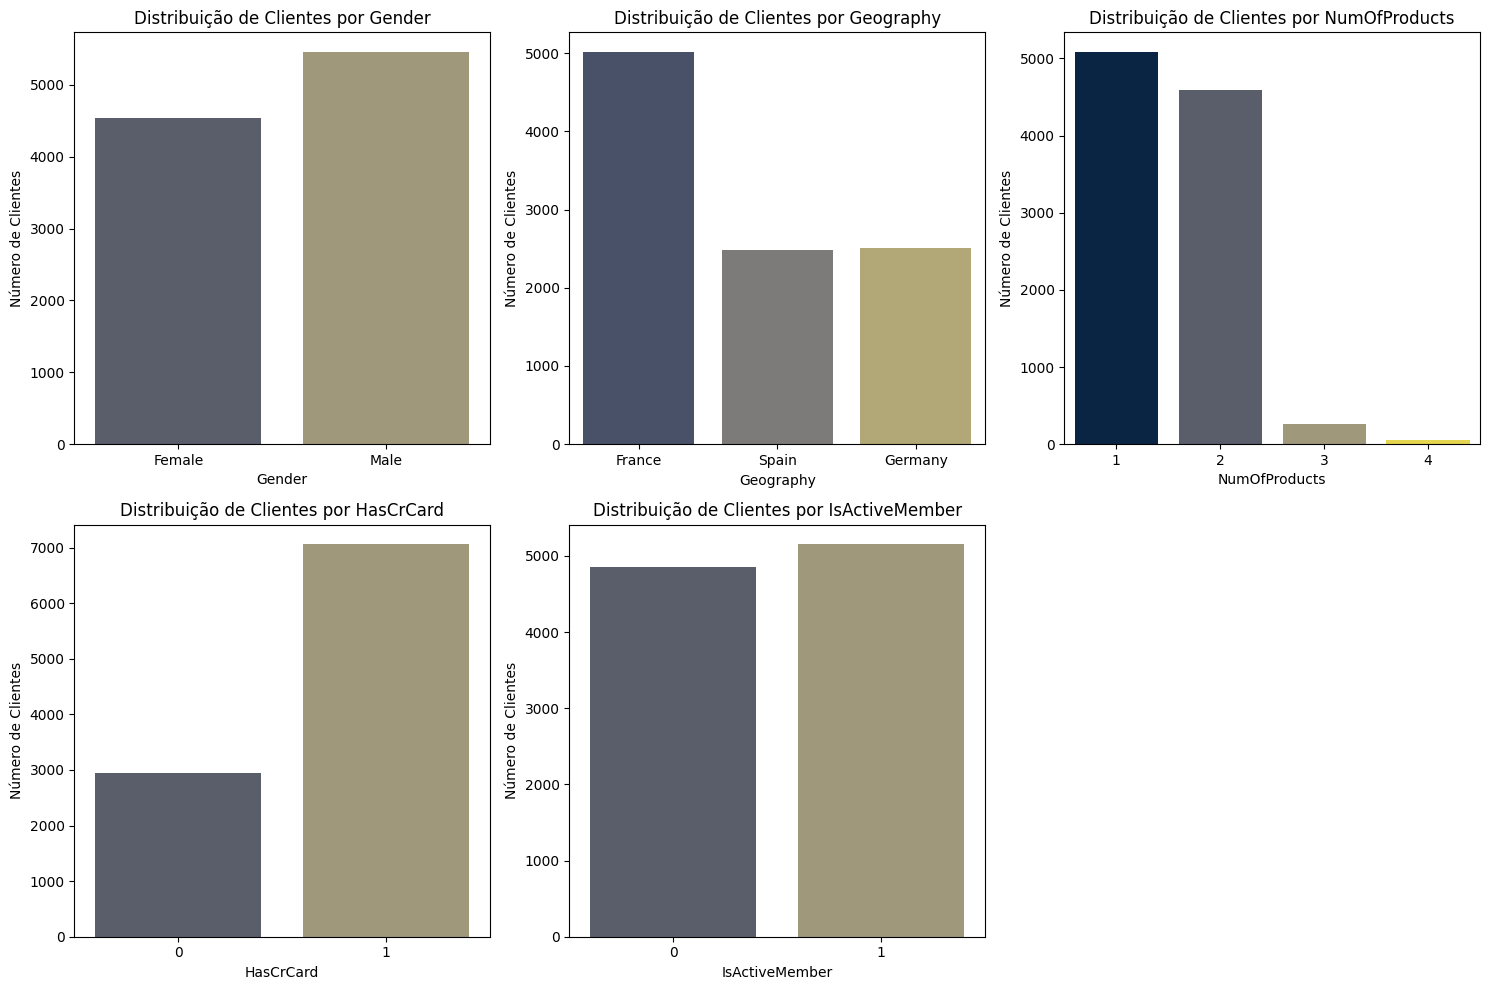

In [52]:
colunas_categoricas = ['Gender', 'Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 10))
for i, col in enumerate(colunas_categoricas, 1):
    plt.subplot(2, 3, i) # Organizar os gráficos em uma grade 2x3
    sns.countplot(x=col, data=df, palette='cividis', hue=col, legend=False)
    plt.title(f'Distribuição de Clientes por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

### 1.5. Análise da Distribuição de Variáveis Numéricas



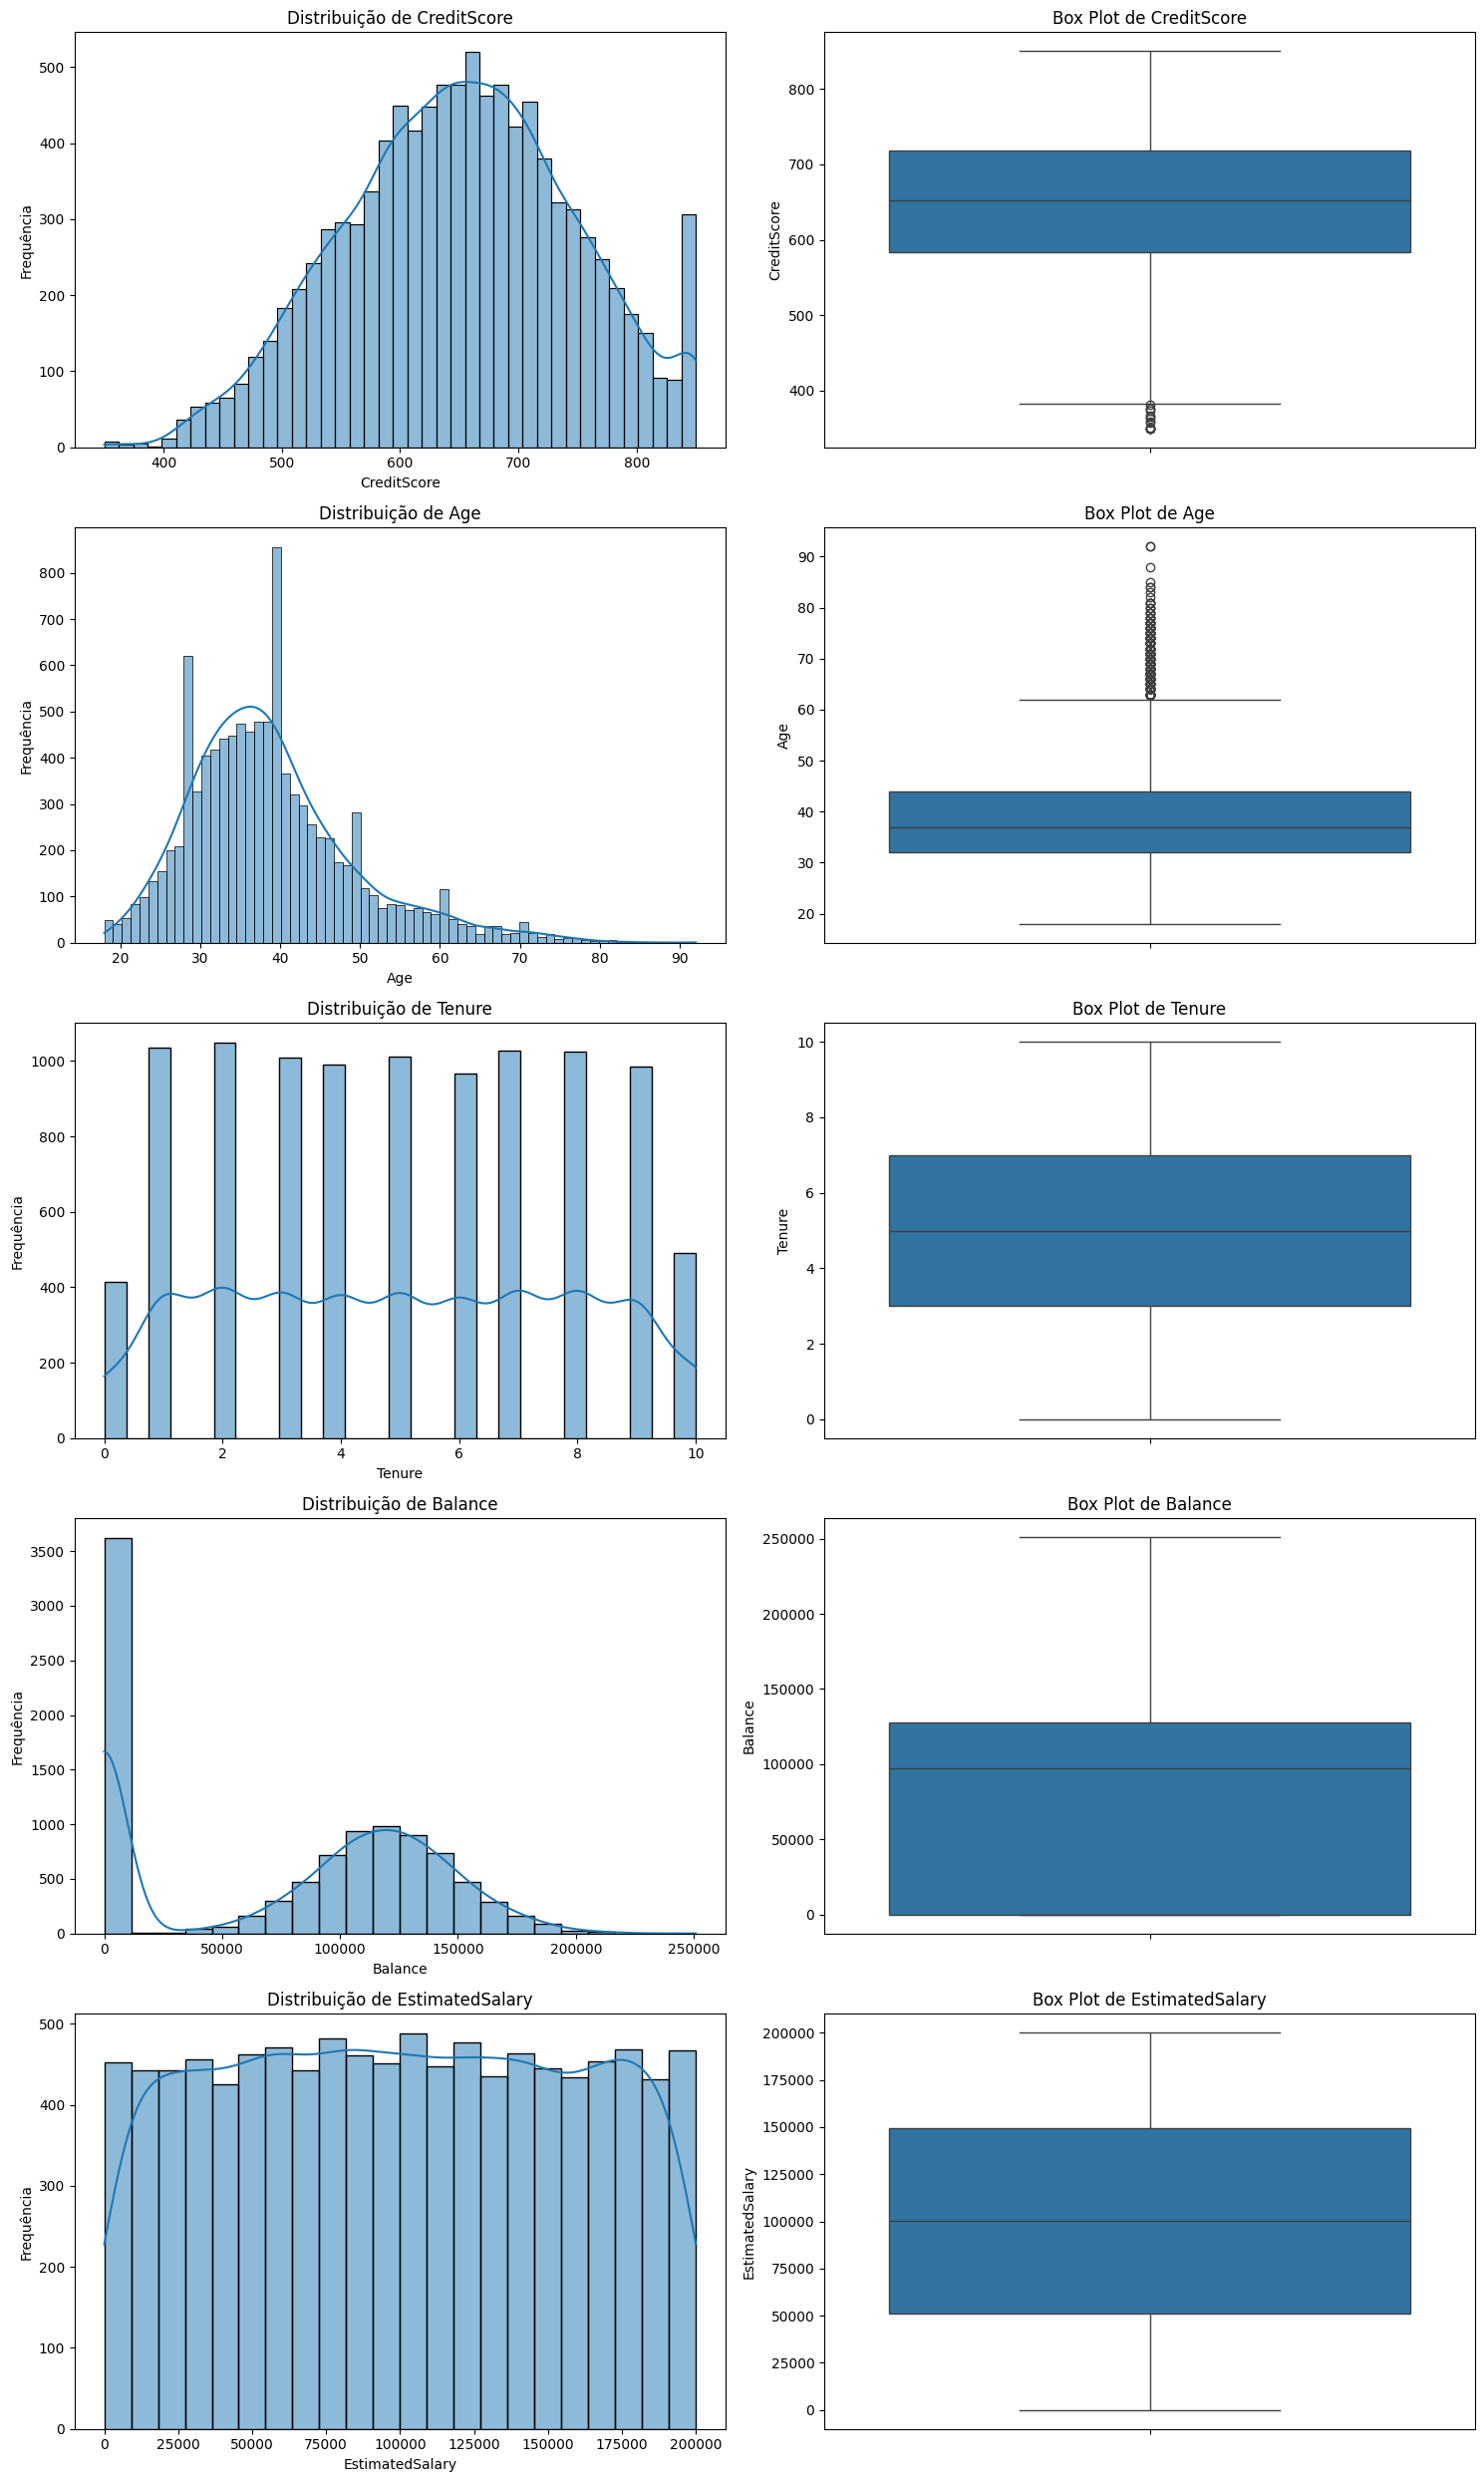

In [53]:
colunas_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

fig, axes = plt.subplots(nrows=len(colunas_numericas), ncols=2, figsize=(15, 5 * len(colunas_numericas)))

for i, col in enumerate(colunas_numericas):

    # Histograma
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribuição de {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequência')

    # Box Plot
    sns.boxplot(y=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot de {col}')
    axes[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

### 1.6. Relação entre Variáveis e 'Exited' (Churn)



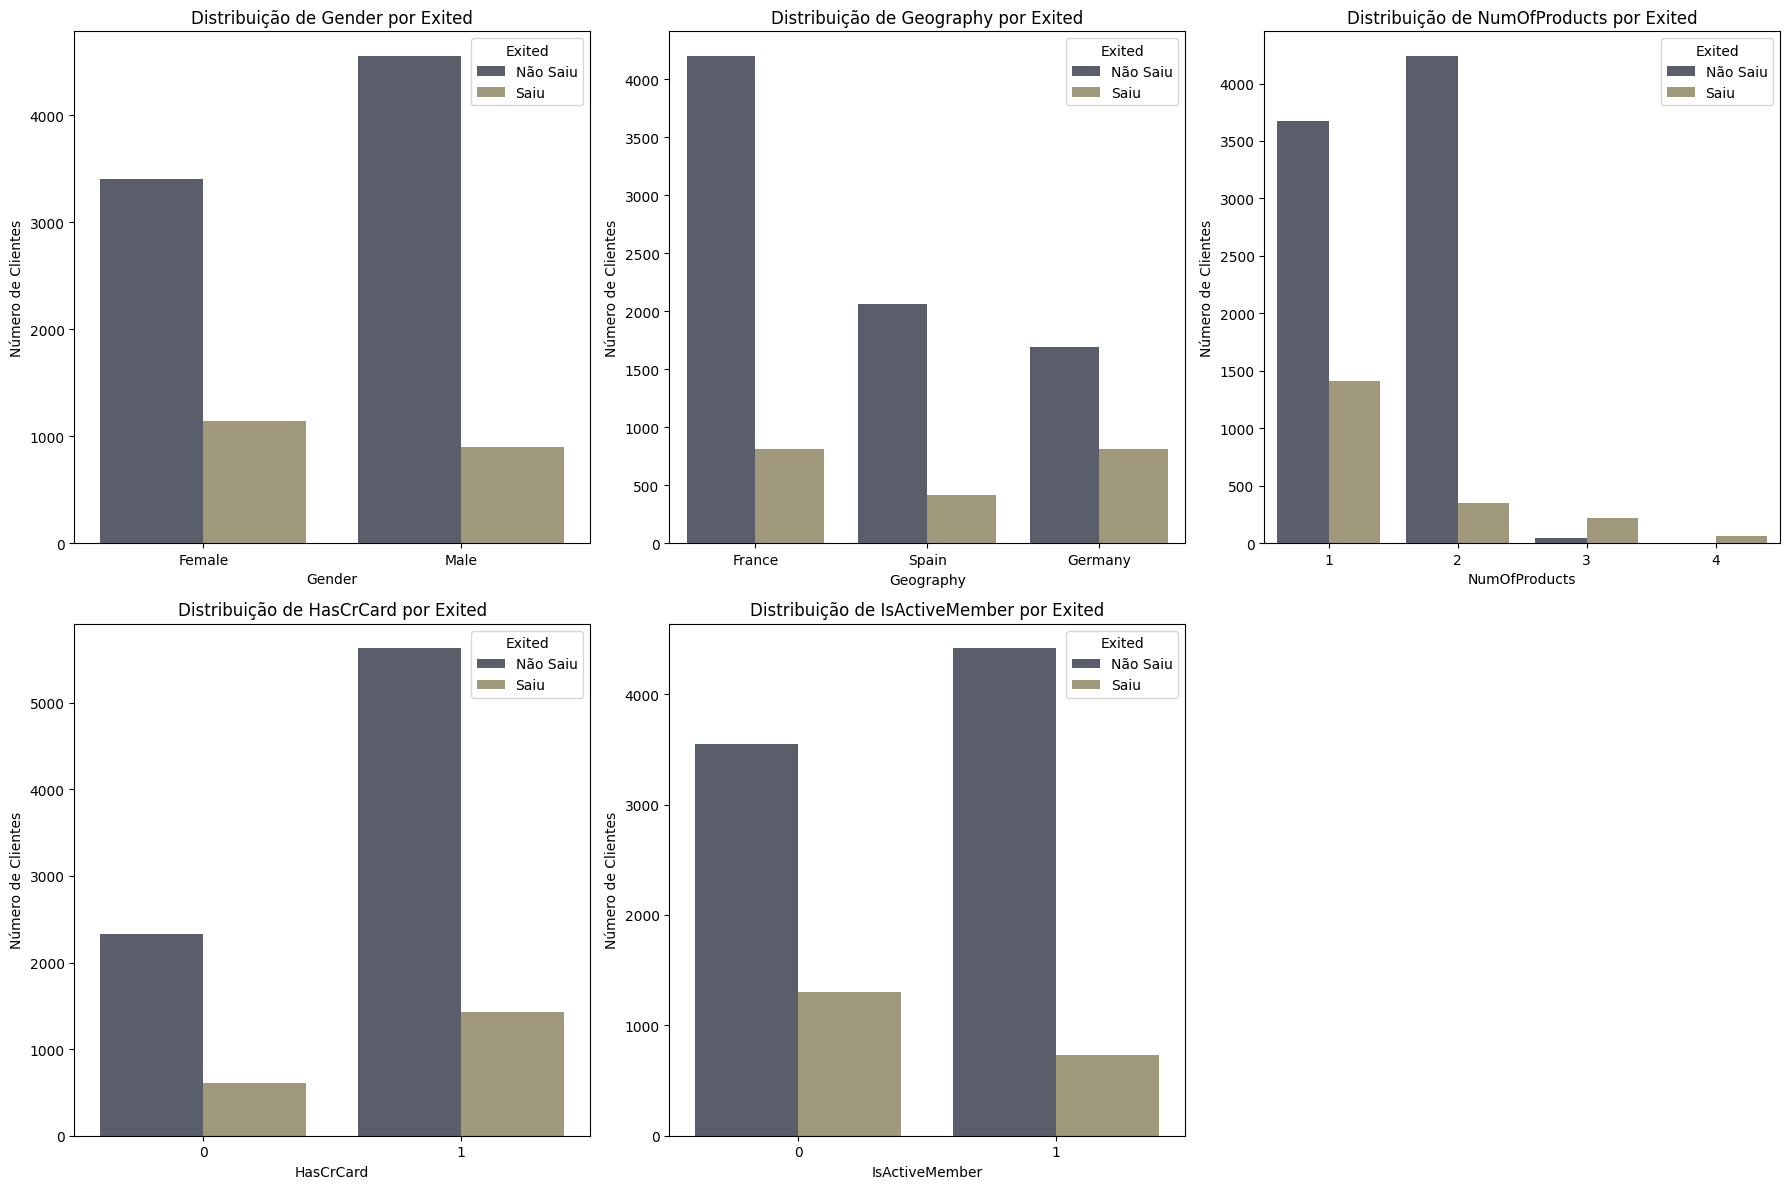

In [54]:
colunas_categoricas = ['Gender', 'Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(18, 12))
for i, col in enumerate(colunas_categoricas, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Exited', data=df, palette='cividis')
    plt.title(f'Distribuição de {col} por Exited')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.legend(title='Exited', labels=['Não Saiu', 'Saiu'])
plt.tight_layout()
plt.show()

Para analisar a relação entre variáveis numéricas e a variável "Exited", vou criar gráficos de  (box plots) comparando as distribuições de clientes que saíram e dos que permaneceram.


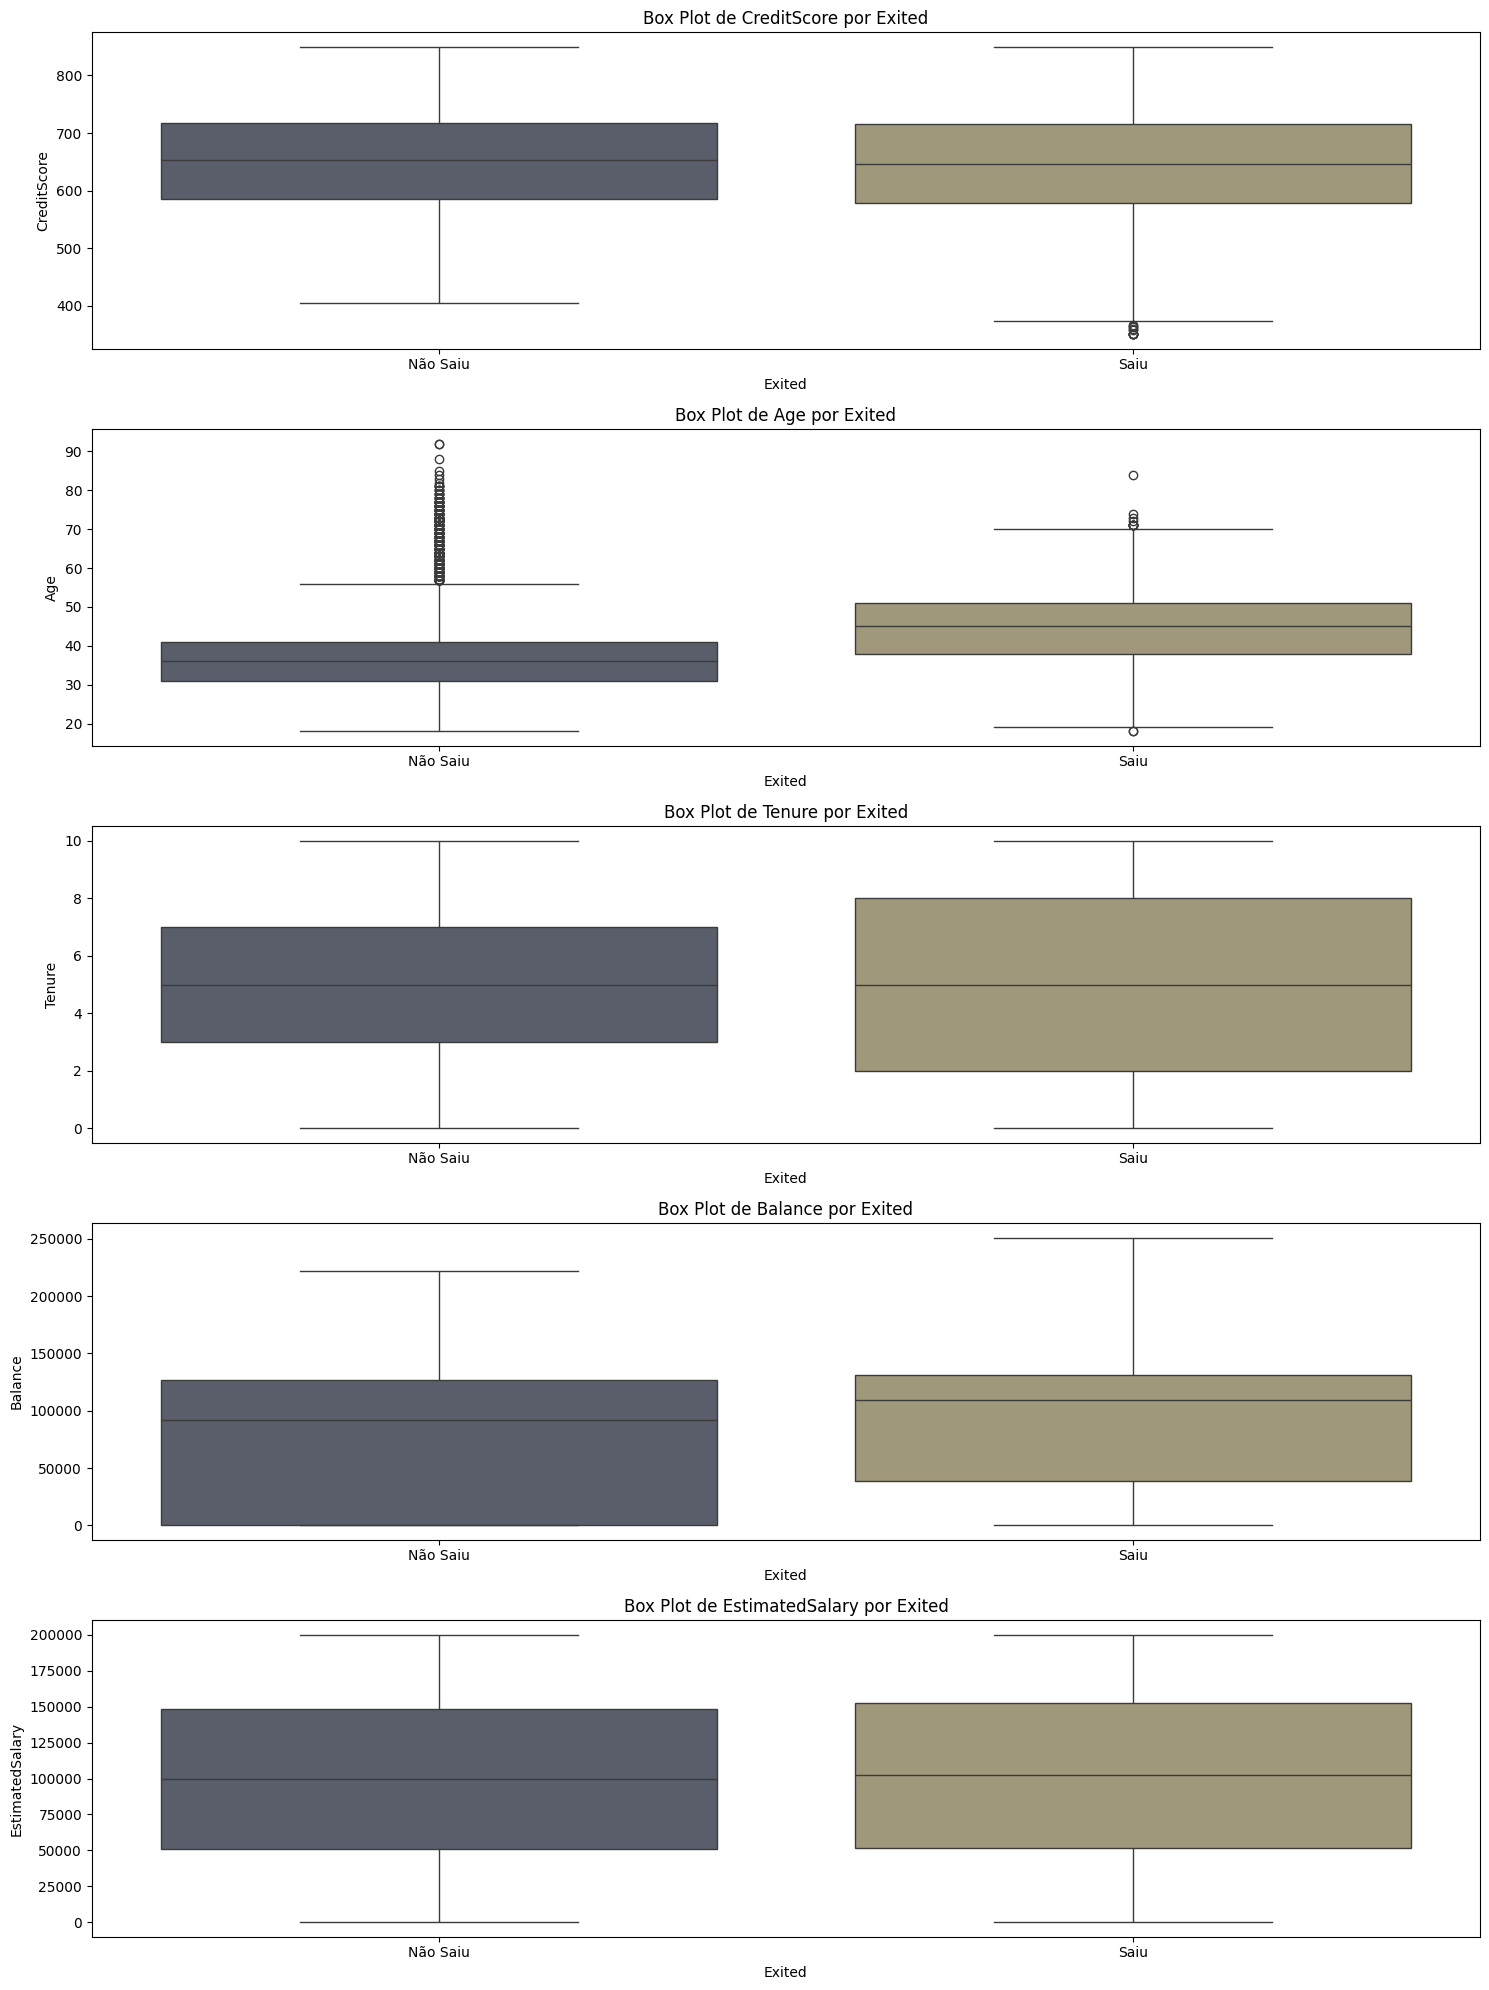

In [55]:
colunas_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 20))
for i, col in enumerate(colunas_numericas, 1):
    plt.subplot(len(colunas_numericas), 1, i)
    sns.boxplot(x='Exited', y=col, data=df, hue='Exited', palette='cividis', legend=False)
    plt.title(f'Box Plot de {col} por Exited')
    plt.xlabel('Exited')
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1], labels=['Não Saiu', 'Saiu'])
plt.tight_layout()
plt.show()

## 2.0. Pré-processamento de Dados

### 2.1. Remover Colunas Irrelevantes

In [56]:
colunas_a_remover = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=colunas_a_remover, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



### 2.2. Codificar Variáveis Categóricas


In [57]:

# Converter as variáveis categóricas 'Geography' e 'Gender' em variáveis numéricas usando One-Hot Encoding.
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df = df_encoded.copy()
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### 2.3. Dividir Dados em Treino e Teste

Separar o DataFrame em conjuntos de treinamento e teste.

In [58]:
# Define a variável alvo (y) e as variáveis preditoras (X)
y = df['Exited']
X = df.drop('Exited', axis=1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (8000, 11)
Dimensões de X_test: (2000, 11)
Dimensões de y_train: (8000,)
Dimensões de y_test: (2000,)


### 2.4. Escalar Variáveis Numéricas



Aplicar padronização (StandardScaler) às variáveis numéricas.

In [59]:


# Define a lista de colunas numéricas a serem escaladas, incluindo as que estão na lista de variáveis numéricas
# e as que eram categóricas binárias e agora são numéricas (0 ou 1)
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Instanciar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler APENAS aos dados de treinamento e transformar as colunas numéricas
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transformar as colunas numéricas nos dados de teste usando o scaler já ajustado
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("X_train (primeiras 5 linhas) após escalonamento:")
print(X_train.head())
print("\nX_test (primeiras 5 linhas) após escalonamento:")
print(X_test.head())

X_train (primeiras 5 linhas) após escalonamento:
      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
9254     0.356500 -0.655786  0.345680 -1.218471       0.808436   0.649203   
1561    -0.203898  0.294938 -0.348369  0.696838       0.808436   0.649203   
1670    -0.961472 -1.416365 -0.695393  0.618629      -0.916688   0.649203   
6087    -0.940717 -1.131148  1.386753  0.953212      -0.916688   0.649203   
6669    -1.397337  1.625953  1.386753  1.057449      -0.916688  -1.540351   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
9254        0.974817         1.367670              False            False   
1561        0.974817         1.661254               True            False   
1670       -1.025834        -0.252807              False             True   
6087       -1.025834         0.915393              False            False   
6669       -1.025834        -1.059600              False            False   

      Gender_Male  
9254 

## 3.0. Treinamento dos Modelos

In [60]:
# Modelo de Regressão Logística
logistic_model = LogisticRegression(random_state=42, solver='liblinear') # Adicionando solver para evitar warning
logistic_model.fit(X_train, y_train)
print("Modelo de Regressão Logística treinado com sucesso.")

Modelo de Regressão Logística treinado com sucesso.


In [61]:
# Modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
print("Modelo de Random Forest treinado com sucesso.")

Modelo de Random Forest treinado com sucesso.


In [62]:
# Modelo de Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
print("Modelo de Gradient Boosting treinado com sucesso.")

Modelo de Gradient Boosting treinado com sucesso.


In [63]:
# Modelo XGBoost
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train, y_train)
print("Modelo XGBoost treinado com sucesso.")

Modelo XGBoost treinado com sucesso.


### 4.0. Avaliação dos Modelos

Avaliar o desempenho de cada modelo treinado utilizando os dados de teste (X_test, y_test) e métricas como acurácia, precisão, recall, F1-score e curva ROC.


--- Logistic Regression ---
Acurácia: 0.8110
Precisão: 0.5524
Recall: 0.2010
F1-Score: 0.2948
AUC: 0.7789

--- Random Forest ---
Acurácia: 0.8665
Precisão: 0.7625
Recall: 0.4656
F1-Score: 0.5782
AUC: 0.8653

--- Gradient Boosting ---
Acurácia: 0.8675
Precisão: 0.7500
Recall: 0.4885
F1-Score: 0.5917
AUC: 0.8729

--- XGBoost ---
Acurácia: 0.8695
Precisão: 0.7171
Recall: 0.5547
F1-Score: 0.6255
AUC: 0.8502


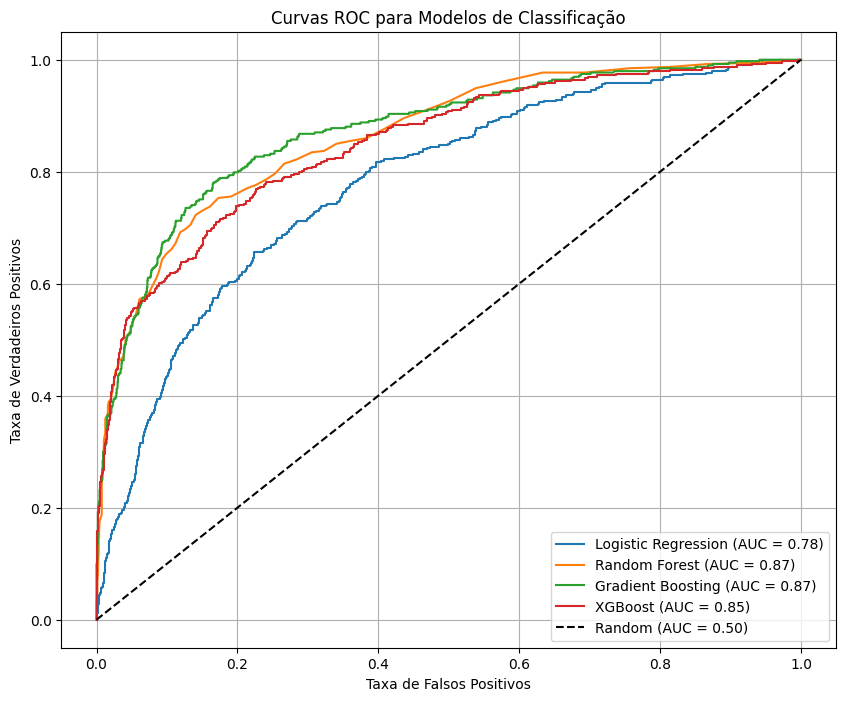

In [64]:
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model,
    "XGBoost": xgboost_model
}

results = {}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # 1. Faça previsões nos dados de teste
    y_pred = model.predict(X_test)

    # 2. Calcule e imprima as métricas de classificação
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n--- {name} ---")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # 3. Calcule a curva ROC e a Área Sob a Curva ROC (AUC)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"AUC: {auc:.4f}")
    results[name] = {'y_pred_proba': y_pred_proba, 'fpr': fpr, 'tpr': tpr, 'auc': auc}

    # Plote a curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC para Modelos de Classificação')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 5.0. Otimização de Hiperparâmetros


Otimizar os hiperparâmetros dos modelos Gradient Boosting e XGBoost usando GridSearchCV para melhorar sua performance.

In [65]:
from sklearn.model_selection import GridSearchCV

# 2. Parâmetros para Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# 3. Parâmetros para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# 4. GridSearchCV para Gradient Boosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid=param_grid_gb,
                              cv=5,
                              scoring='roc_auc',
                              n_jobs=-1, # Usar todos os núcleos disponíveis
                              verbose=2)

# 5. Ajustar grid_search_gb aos dados de treinamento
print("Iniciando GridSearchCV para Gradient Boosting...")
grid_search_gb.fit(X_train, y_train)
print("GridSearchCV para Gradient Boosting concluído.")

# 6. Imprimir os melhores parâmetros e a melhor pontuação para Gradient Boosting
print("\nMelhores parâmetros para Gradient Boosting:", grid_search_gb.best_params_)
print("Melhor pontuação (ROC AUC) para Gradient Boosting:", grid_search_gb.best_score_)

# 7. GridSearchCV para XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(eval_metric='logloss', random_state=42),
                               param_grid=param_grid_xgb,
                               cv=5,
                               scoring='roc_auc',
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=2)

# 7. Ajustar grid_search_xgb aos dados de treinamento
print("\nIniciando GridSearchCV para XGBoost...")
grid_search_xgb.fit(X_train, y_train)
print("GridSearchCV para XGBoost concluído.")

# 7. Imprimir os melhores parâmetros e a melhor pontuação para XGBoost
print("\nMelhores parâmetros para XGBoost:", grid_search_xgb.best_params_)
print("Melhor pontuação (ROC AUC) para XGBoost:", grid_search_xgb.best_score_)

# 8. Atualizar os modelos com os melhores estimadores
gradient_boosting_model = grid_search_gb.best_estimator_
xgboost_model = grid_search_xgb.best_estimator_

print("\nModelos Gradient Boosting e XGBoost atualizados com os melhores hiperparâmetros.")

Iniciando GridSearchCV para Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV para Gradient Boosting concluído.

Melhores parâmetros para Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Melhor pontuação (ROC AUC) para Gradient Boosting: 0.8630137953800894

Iniciando GridSearchCV para XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV para XGBoost concluído.

Melhores parâmetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhor pontuação (ROC AUC) para XGBoost: 0.8627418223795316

Modelos Gradient Boosting e XGBoost atualizados com os melhores hiperparâmetros.


## 6.0. Salvando o Modelo Otimizado

Vamos salvar o modelo XGBoost otimizado, pois ele apresentou uma boa performance e foi otimizado na etapa anterior. Usaremos a biblioteca `joblib` para serializar o modelo.

In [66]:
import joblib

# Nome do arquivo para salvar o modelo
model_filename = 'xgboost_optimized_churn_model.joblib'

# Salvar o modelo
joblib.dump(xgboost_model, model_filename)

print(f"Modelo salvo como '{model_filename}'")

Modelo salvo como 'xgboost_optimized_churn_model.joblib'


## 7.0. Preparar Dados para o Arquivo de Predições


In [67]:
df_original = pd.read_csv('Churn_Modelling.csv')

# Identificar os índices originais das linhas que foram usadas para criar o X_test
test_original_indices = X_test.index

# Usar esses índices para selecionar as linhas correspondentes do df_original
df_test_original = df_original.loc[test_original_indices].copy()

print("DataFrame original recarregado e filtrado para o conjunto de teste.")
print(df_test_original.head())

DataFrame original recarregado e filtrado para o conjunto de teste.
      RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
6252       6253    15687492  Anderson          596   Germany    Male   32   
4684       4685    15736963   Herring          623    France    Male   43   
1731       1732    15721730    Amechi          601     Spain  Female   44   
4742       4743    15762134     Liang          506   Germany    Male   59   
4521       4522    15648898    Chuang          560     Spain  Female   27   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
6252       3   96709.07              2          0               0   
4684       1       0.00              2          1               1   
1731       4       0.00              2          1               0   
4742       8  119152.10              2          1               1   
4521       7  124995.98              1          1               1   

      EstimatedSalary  Exited  
6252         41788.37 

## 8.0 Calcular Probabilidade e Nível de Risco de Churn


Utilizar o modelo XGBoost otimizado para prever a probabilidade de churn para o conjunto de teste (X_test) e, em seguida, categorizar essas probabilidades em níveis de risco (Baixo, Médio, Alto).

In [68]:
predicted_churn_proba = xgboost_model.predict_proba(X_test)[:, 1]
df_test_original['Predicted_Churn_Probability'] = predicted_churn_proba

print("Probabilidades de churn previstas adicionadas ao df_test_original.")
print(df_test_original[['CustomerId', 'Predicted_Churn_Probability']].head())

Probabilidades de churn previstas adicionadas ao df_test_original.
      CustomerId  Predicted_Churn_Probability
6252    15687492                     0.047209
4684    15736963                     0.040088
1731    15721730                     0.102332
4742    15762134                     0.214862
4521    15648898                     0.106515


Vou categorizar as probabilidades previstas de churn em níveis de risco 'Baixo', 'Médio' e 'Alto'

In [69]:
bins = [0, 0.3, 0.7, 1.0]
labels = ['Baixo', 'Médio', 'Alto']

df_test_original['Risk_Level'] = pd.cut(df_test_original['Predicted_Churn_Probability'], bins=bins, labels=labels, right=False)

print("Níveis de risco de churn adicionados ao df_test_original.")
print(df_test_original[['CustomerId', 'Predicted_Churn_Probability', 'Risk_Level']].head())

Níveis de risco de churn adicionados ao df_test_original.
      CustomerId  Predicted_Churn_Probability Risk_Level
6252    15687492                     0.047209      Baixo
4684    15736963                     0.040088      Baixo
1731    15721730                     0.102332      Baixo
4742    15762134                     0.214862      Baixo
4521    15648898                     0.106515      Baixo


## 9.0. Consolidar e Salvar Arquivo de Predições



Combinar o CustomerId, as variáveis originais, o churn real (y_test), a probabilidade de churn e o nível de risco em um único DataFrame e salvá-lo como churn_predictions.csv.

In [70]:
df_test_original = df_test_original.copy()
df_test_original['Actual_Churn'] = y_test

print("Coluna 'Actual_Churn' adicionada ao df_test_original.")
print(df_test_original[['CustomerId', 'Predicted_Churn_Probability', 'Risk_Level', 'Actual_Churn']].head())

Coluna 'Actual_Churn' adicionada ao df_test_original.
      CustomerId  Predicted_Churn_Probability Risk_Level  Actual_Churn
6252    15687492                     0.047209      Baixo             0
4684    15736963                     0.040088      Baixo             0
1731    15721730                     0.102332      Baixo             0
4742    15762134                     0.214862      Baixo             0
4521    15648898                     0.106515      Baixo             0


In [71]:
df_test_original.to_csv('churn_predictions.csv', index=False)
print("Arquivo 'churn_predictions.csv' salvo com sucesso.")

Arquivo 'churn_predictions.csv' salvo com sucesso.
